### PreProcessing The Data

In [20]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"@\w+|#\w+|RT", "", text)  
    text = re.sub(r"[^A-Za-z\s]", "", text)  
    text = text.lower()
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text


[nltk_data] Downloading package stopwords to C:\Users\MIRZA
[nltk_data]     SHAHYAAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Model Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pandas as pd

df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)

df.columns = ['label', 'id', 'date', 'query', 'user', 'text']

df = df.sample(n=10000, random_state=42)

df['label'] = df['label'].replace({0: 'negative', 4: 'positive'})

df['cleaned'] = df['text'].apply(clean_text)

X = df['cleaned']
y = df['label']

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.69      0.73      0.71       980
    positive       0.73      0.68      0.70      1020

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



### Visualization

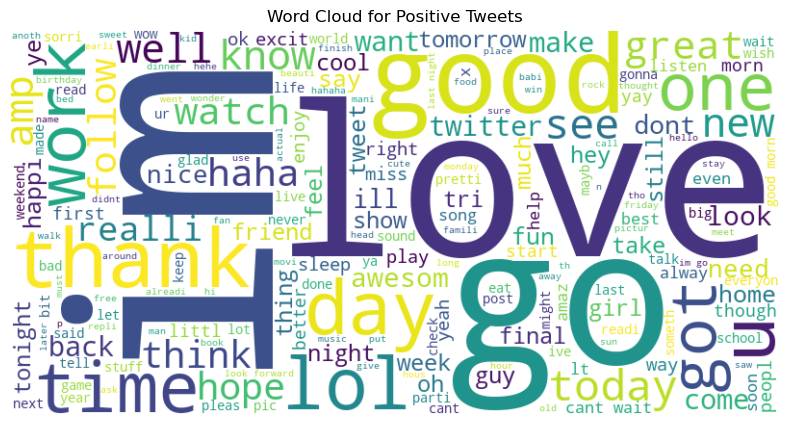

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['label'] == 'positive']['cleaned'])

if positive_text.strip():  
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Positive Tweets")
    plt.show()
else:
    print("No text data available to generate a word cloud.")
